# GRIP:The Sparks Foundation
## Ramyalakshmi.L
### Task 1: Prediction using Supervised Ml
#### *Here,we will be predicting the percentage of a student based on the number of hours he/she studied.Since two varibles are involved it is a Simple Linear Regression.The two variables are the number hours the student studied and the target value which is the percentage he/she would get*

In [51]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as linear_model


In [52]:
#import dataset
url="http://bit.ly/w-data"
data=pd.read_csv(url)


In [53]:
#quick view of the dataset
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Knowing about the dataset

In [54]:

data.shape

(25, 2)

In [55]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


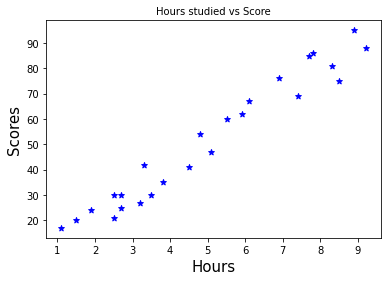

In [57]:
##ploting Scatter plot----
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Hours studied vs Score', fontsize=10)
plt.scatter(data.Hours,data.Scores,color='blue',marker='*')
plt.show()

In [58]:
#there is linear relation between the two variables. This can be validated the help of pearson's product moment correlation.
#Pearson's product moment correlation coefficient (r) is given as a measure of linear association between the two variables.
data.corr(method='pearson')



,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [59]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


# LINEAR REGRESSION

In [60]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values


In [61]:
#PREPARING THE DATA AND SEPERATING THEM AS TRAIN AND TESTS
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=50)


In [62]:
#TRAINING THE MODELS
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,Y_train)

LinearRegression()

In [63]:

print("B0 =",linreg.intercept_,"\nB1 =",linreg.coef_)
Y0 = linreg.intercept_ + linreg.coef_*X_train


B0 = 2.8102364628265804 
B1 = [9.59563563]


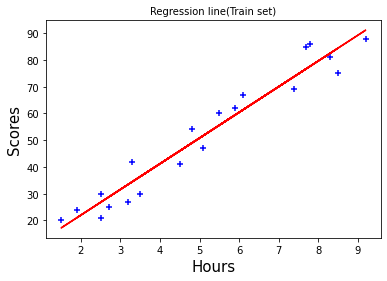

In [72]:
# plotting on train data
plt.scatter(X_train,Y_train,color='blue',marker='+')
plt.plot(X_train,Y0,color='red')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=10)
plt.show()

In [65]:
# predicting the Scores for test data
Y_pred=linreg.predict(X_test)
print(Y_pred)

[88.21139357 28.71845267 69.02012231 39.27365186 13.36543566]


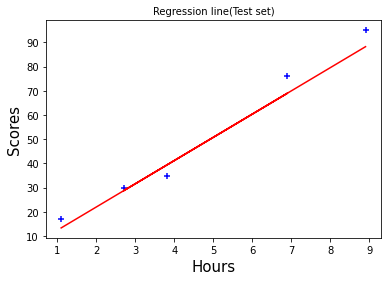

In [73]:
# plotting line on test data
plt.plot(X_test,Y_pred,color='red')
plt.scatter(X_test,Y_test,color='blue',marker='+')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=10)
plt.show()

# Comparing actual and predictive data

In [67]:
Y_test1 = list(Y_test)
prediction=list(Y_pred)
df_compare = pd.DataFrame({ 'Actual':Y_test1,'Result':prediction})
df_compare

,Actual,Result
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


# Accuracy of the model

In [68]:
from sklearn import metrics
metrics.r2_score(Y_test,Y_pred)

0.971014141329942

# Predictng the error

In [69]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [70]:

MSE = metrics.mean_squared_error(Y_test,Y_pred)
root_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
Abs_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)

Mean Squared Error      =  25.58407829653998
Root Mean Squared Error =  5.0580706100785084
Mean Absolute Error     =  5.0580706100785084


# Predicting the score

In [71]:

Prediction_score = linreg.predict([[9.25]])
print("Predicted score for a student studying for 9.25 hours :",Prediction_score)

Predicted score for a student studying for 9.25 hours : [91.56986604]
